# `01` Import Necessary Libraries

## `i` Default Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries

In [1]:
from sklearn.impute import  KNNImputer
from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer, StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.svm import  LinearSVC , SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

----------------------------

# `02` Load Data

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
train = pd.read_csv('train.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_1684\4177423669.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('Data/train.csv')


In [4]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis


### Helper Function

In [ ]:
def get_nonfloat(col):
    notFloat = []
    for i in train[col]:
        try:
            float(i)
        except:
            notFloat.append(i)

    return notFloat

def types_of_loan():
    types = []
    for t in train["Type_of_Loan"]:
        try:
            temp = t.split(",")
            for item in temp:
                if "and" in item:
                    item = item.split("and")
                item = item.strip()
                types.append(item)
        except:
            pass

    types = list(set(types))
    types.sort()
    return types

### General EDA

In [ ]:
train.head(12)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
train["Customer_ID"].value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

So I have 12500 unique customer, each customer has 8 rows associated with him to represent monthes from January to Augest</br>
Makes sense: 12500 customer * 8 monthes = 100000 rows 

### Columns that will not be a feature 

- ID
- Customer_ID
- Name
- SSN

Customer_ID will be used at preprocessing to group by, because some rows has missing / corrupted data but has the same Customer_ID</br>
The rest will be droped

### Monthly_Inhand_Salary

In [ ]:
len(train["Monthly_Inhand_Salary"].value_counts())

13235

 Monthly_Inhand_Salary has more values than Customer_ID which means that the salary per month is not fixed for each customer. It could change from month to month for the same customer</br></br>
therfore I can't fill the missing values with the same Salary a customer had on an existing month

### Annual_Income

In [ ]:
nonfloat = get_nonfloat("Annual_Income")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 6980
34847.84_
30689.89_
35547.71_
34081.38_
114838.41_
88640.24_
54392.16_
8701.545_
8701.545_
25546.26_


Annual_Income is of object type because some values contains <span style="color:yellow"> _ </span> at the end of number</br>
Remove the <span style="color:yellow"> _ </span> then try to change data type for the whole column for preprocessing

### Occupation

In [ ]:
train["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

it seems like I have hidden null  as  <span style="color:yellow">"_______"</span> </br>
It will be solved by grouping all the column by Customer Id and find the missing values </br>
If the customer has no occupation in his 8 rows it will be identfined as <span style="color:skyblue">"unkown"</span>

### Num_of_Loan

In [ ]:
nonfloat = get_nonfloat("Num_of_Loan")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 4785
0_
3_
3_
2_
5_
2_
0_
0_
5_
2_


It has the same problem as Annual_Income some values contains <span style="color:yellow"> _ </span> at the end of number</br>
Remove the <span style="color:yellow"> _ </span> then try to change data type for the whole column for preprocessing

### Type_of_Loan

In [ ]:
train["Type_of_Loan"].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
nonfloat = get_nonfloat("Type_of_Loan")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 88592
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan
Credit-Builder Loan
Credit-Builder Loan


We see that non-float items is 88592 from the *.info* we recall that Type_of_Loan &ensp; 88592 non-null   object </br>
Nulls considered as floats, I must change all nulls to <span style="color:skyblue">"Not Specified"</span> first

In [ ]:
types = types_of_loan()

for t in types:
    print(t)
print(len(types))


Auto Loan
Credit-Builder Loan
Debt Consolidation Loan
Home Equity Loan
Mortgage Loan
Not Specified
Payday Loan
Personal Loan
Student Loan
9


Type_of_Loan define the type of diffrent loans in one line </br>
- It could be seperated by the "," then by the word "and"
- There are only 8 types of loans and "Not Specified"

They can be mapped before training 

### Delay_from_due_date

In [ ]:
train["Delay_from_due_date"].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

Some number are negative but, the number of feayed days can't be negative </br>
 I'm assuming it was a problem with data entery so I'll take the absolute for all numbers 

### Num_of_Delayed_Payment

In [ ]:
train["Num_of_Delayed_Payment"]

0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: object

In [ ]:
nonfloat = get_nonfloat("Num_of_Delayed_Payment")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 2744
8_
3_
3_
2_
13_
14_
12_
8_
22_
14_


**AGAIN** some values contains <span style="color:yellow"> _ </span> at the end of number</br>
Remove the <span style="color:yellow"> _ </span> then try to change data type for the whole column for preprocessing </br></br>
But this time I have some missing values, will be equale 0 </br>
because I can't fill using group by, the delay changes over each month

### Changed_Credit_Limit

In [ ]:
train["Changed_Credit_Limit"].dtype

dtype('O')

In [ ]:
nonfloat = get_nonfloat("Changed_Credit_Limit")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 2091
_
_
_
_
_
_
_
_
_
_


it's an object type because null are written as "_"

### Num_Credit_Inquiries

In [ ]:
train["Num_Credit_Inquiries"]

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64

Need to resolve null problem

### Credit_Mix

In [ ]:
train["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

Ordinal and Categorical: will be mapped by label encoder </br>
nulls are interrupted as "_". TRY to resolve before mapping

### Outstanding_Debt

In [ ]:
train["Outstanding_Debt"].dtype

dtype('O')

In [ ]:
nonfloat = get_nonfloat("Outstanding_Debt")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 1009
1328.93_
1283.37_
2797.17_
3818.57_
343.84_
363.51_
404.51_
1755.81_
2593.44_
89.62_


"_" object to float problem

### Credit_History_Age

In [ ]:
train["Credit_History_Age"]

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

It'a an age column but contain nulls</br>
Changing the type after procsessing will be a good idea

### Payment_of_Min_Amount

In [ ]:
train["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

Categorical column: one hot encoding can be used </br>
I think NM is "Not Mentioned" then try to solve by:
- Grouping over Customer Id to have a binary column

If not possiple:
- Considre NM as a third category


### Amount_invested_monthly

In [ ]:
train["Amount_invested_monthly"]

0         80.41529543900253
1        118.28022162236736
2           81.699521264648
3         199.4580743910713
4        41.420153086217326
                ...        
99995     60.97133255718485
99996     54.18595028760385
99997     24.02847744864441
99998    251.67258219721603
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 100000, dtype: object

In [ ]:
train["Amount_invested_monthly"].dtype

dtype('O')

In [ ]:
nonfloat = get_nonfloat("Amount_invested_monthly")

print(f"non float itmes: {len(nonfloat)}")
for i in range(10):
    print(nonfloat[i])

non float itmes: 4305
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__
__10000__


- There are nulls to handle
- The value 10000 is written as "__10000\__"

10000 is out of range of values in the column it means somthing else

### Payment_Behaviour

In [ ]:
train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

So we have 6 unique behaviours
- Map them directly __OR__ try to proscess them before mapping
- Corupted / Nulls found as "!@9#%8"

### Monthly_Balance

In [ ]:
train["Monthly_Balance"].isna().sum()

1200

In [ ]:
train["Monthly_Balance"].dtype

dtype('O')

In [ ]:
nonfloat = get_nonfloat("Monthly_Balance")

print(f"non float itmes: {len(nonfloat)}")
for i in nonfloat:
    print(i)

non float itmes: 9
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__
__-333333333333333333333333333__


In [ ]:
train["Monthly_Balance"].head(10)

0    312.49408867943663
1    284.62916249607184
2     331.2098628537912
3    223.45130972736786
4    341.48923103222177
5     340.4792117872438
6     244.5653167062043
7    358.12416760938714
8    470.69062692529184
9     484.5912142650067
Name: Monthly_Balance, dtype: object

Some notes found:
1. There are nulls to be handeled
2. the number -333333333333333333333333333 found as __-333333333333333333333333333\__
3. By observing the correct numbers, the number -333333333333333333333333333 is logicaly not true

which means that it has another meaning

In [ ]:
train[train["Monthly_Balance"] == 0.0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


Since there is no Monthly_Balance = 0</br>
therfore we can conclude that:
- the -333333333333333333333333333 value (large negative number) considered as empty balance (equales 0)
- Or I will fill it by the average over each client rows


### columns have no issues

1. Num_Bank_Accounts
2. Num_Credit_Card
3. Interest_Rate
4. Credit_Utilization_Ratio
5. Total_EMI_per_month

### Credit_Score

In [ ]:
train["Credit_Score"].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Target Column has 3 classes

## `ii` Visual Analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

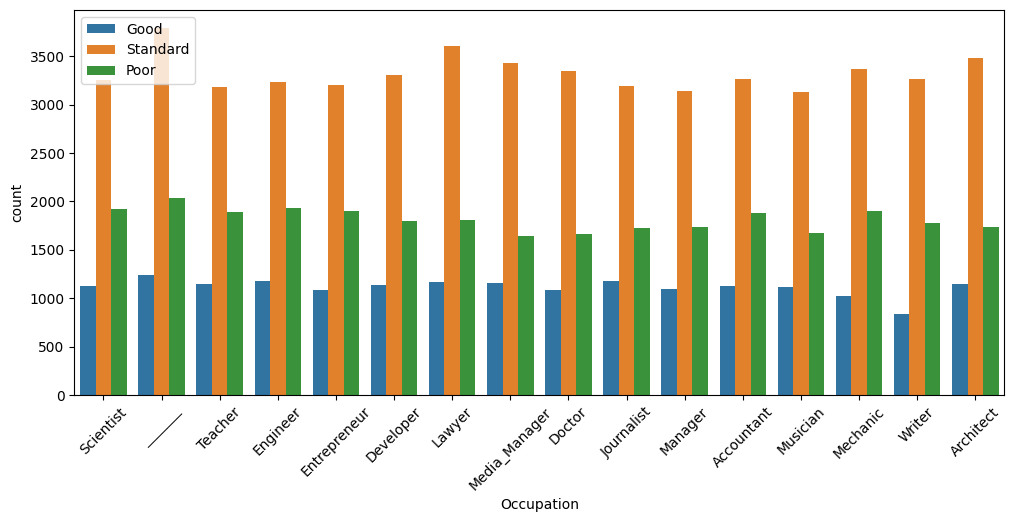

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data=train, x='Occupation', hue='Credit_Score')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

From the graph different occupations have almost the same distribution for each credit score

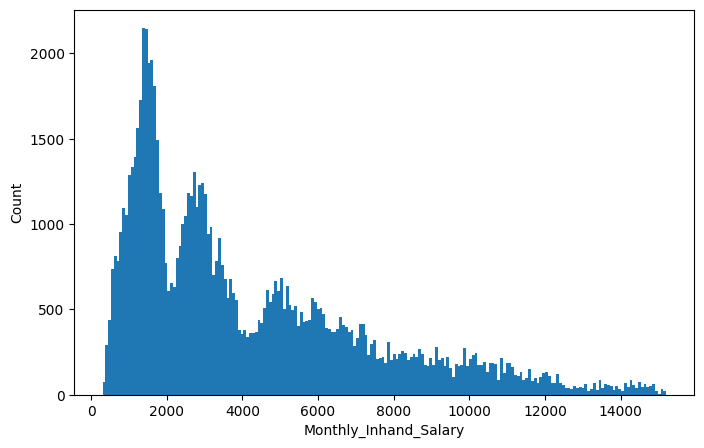

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(train["Monthly_Inhand_Salary"], bins=200)
plt.xlabel("Monthly_Inhand_Salary")
plt.ylabel("Count")
plt.show()

- Skewed
- Many Outliers

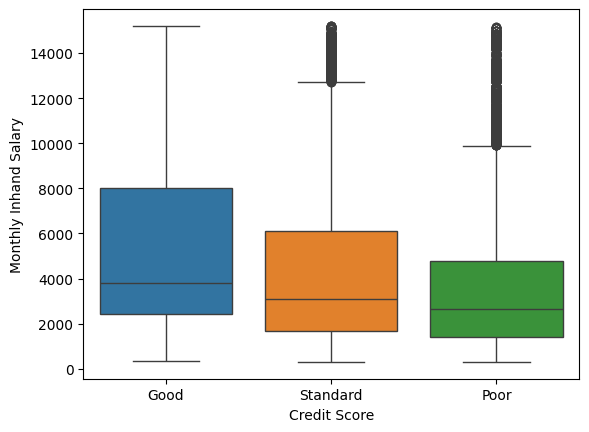

In [ ]:
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=train, hue = 'Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Monthly Inhand Salary')
plt.show()

- People with a Good credit score tend to have higher monthly salaries compared to those with Standard or Poor credit scores.
- People with a Poor credit score have the lowest monthly salaries on average.

There seems to be a positive correlation between income level and credit score. Higher income people are more likely to have a Good credit score, while lower income people are more likely to have a Poor credit score.

In [ ]:
data = train.copy()
data["Num_of_Loan"] = data["Num_of_Loan"].str.replace('_', '', regex=False).astype(float)
data["Outstanding_Debt"] = data["Outstanding_Debt"].str.replace('_', '', regex=False).astype(float)

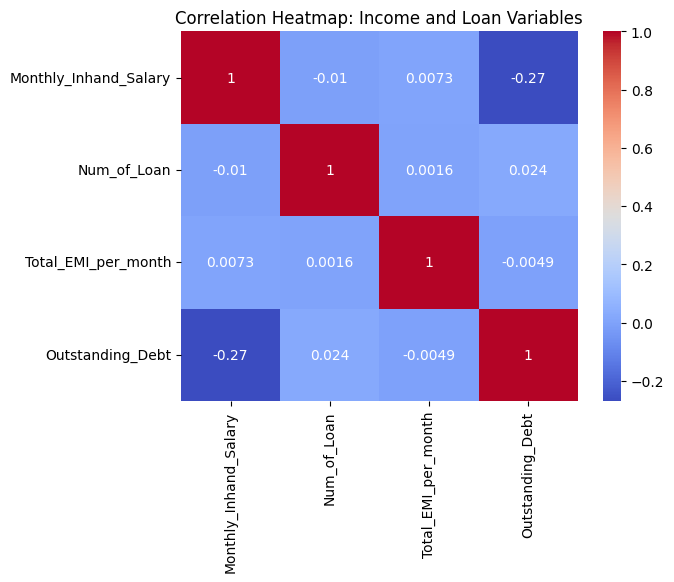

In [ ]:
corr = data[['Monthly_Inhand_Salary', 'Num_of_Loan', 'Total_EMI_per_month', 'Outstanding_Debt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Income and Loan Variables')
plt.show()

- Income does not strongly affect the number of loans, EMI amounts, or outstanding debt.

In [ ]:
data["Amount_invested_monthly"] = pd.to_numeric(data["Amount_invested_monthly"], errors='coerce')
data.dropna(subset=["Amount_invested_monthly"], inplace=True)

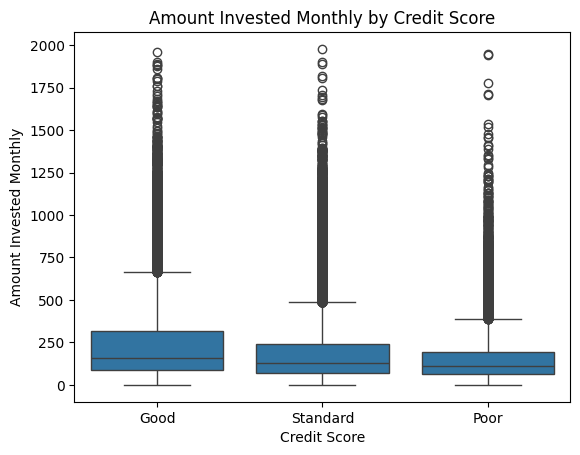

In [ ]:
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=data)
plt.title('Amount Invested Monthly by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Amount Invested Monthly')
plt.show()

- There is trend where better credit scores correlate with higher monthly investments.

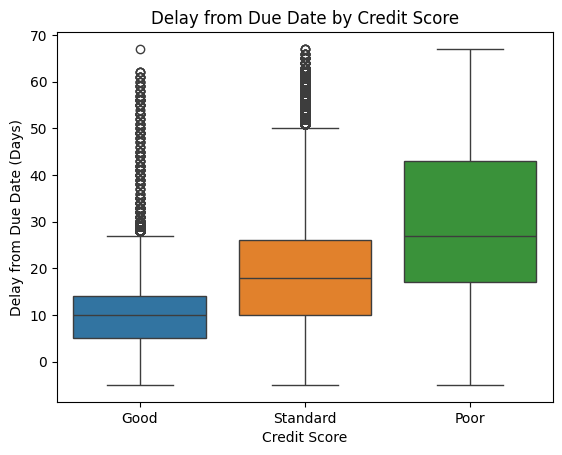

In [ ]:
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=data, hue= 'Credit_Score')
plt.title('Delay from Due Date by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Delay from Due Date (Days)')
plt.show()

- the less the delay is the higher the score of Credit

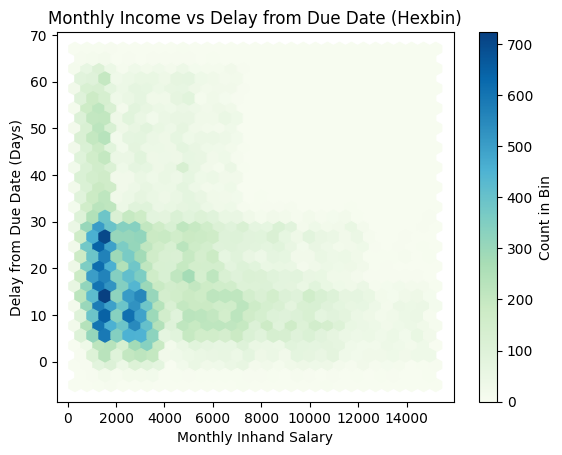

In [ ]:
plt.hexbin(data['Monthly_Inhand_Salary'], data['Delay_from_due_date'], gridsize=30, cmap='GnBu')
plt.title('Monthly Income vs Delay from Due Date (Hexbin)')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Delay from Due Date (Days)')
plt.colorbar(label='Count in Bin')
plt.show()

- People with incomes below $5000 tend to have more frequent and longer delays.

----------------

# `04` Data Preparation

In [4]:
def remove_underscores_and_convert(df, col, to_float=True):
    df[col] = df[col].astype(str).str.replace('_', '', regex=False)
    if to_float:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def process_type_of_loan(df):
    df['Type_of_Loan'] = df['Type_of_Loan'].astype(str).str.replace(' and ', ', ')
    df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ')
    df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: [item.strip().rstrip(',') for item in x] if isinstance(x, list) else [])
    mlb = MultiLabelBinarizer()
    one_hot_encoded = pd.DataFrame(mlb.fit_transform(df['Type_of_Loan']), columns=mlb.classes_)
    df = pd.concat([df, one_hot_encoded], axis=1).drop(columns=['Type_of_Loan','nan'])
    return df

In [5]:
X = train.drop('Credit_Score', axis=1)
y = train['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (90000, 27)
X_test shape: (10000, 27)
y_train shape: (90000,)
y_test shape: (10000,)


In [7]:
X_trainp ,X_validp, y_trainp, y_validp = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [8]:
X_trainp.reset_index(drop=True, inplace=True)
y_trainp.reset_index(drop=True, inplace=True)
X_validp.reset_index(drop=True, inplace=True)
y_validp.reset_index(drop=True, inplace=True)

In [10]:
print(f"X_train shape: {X_trainp.shape}")
print(f"X_test shape: {X_validp.shape}")
print(f"y_train shape: {y_trainp.shape}")
print(f"y_test shape: {y_validp.shape}")

X_train shape: (81000, 27)
X_test shape: (9000, 27)
y_train shape: (81000,)
y_test shape: (9000,)


In [6]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#### Column processing

In [25]:
drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Credit_History_Age']
X_train = X_train.drop(drop_cols, axis=1)

print(f"X_train shape: {X_train.shape}")

X_train shape: (90000, 21)


In [108]:
remove_underscore_cols = ["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Outstanding_Debt", "Age"]

for col in remove_underscore_cols:
    X_train = remove_underscores_and_convert(X_train, col)

X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
61183,29,Media_Manager,57132.48,4480.040000,0,7,9,2,"Mortgage Loan, and Student Loan",27,...,4.37,0.0,Good,1108.63,40.621860,No,56.625125,109.73016291101271,High_spent_Medium_value_payments,531.6487124660089
46647,23,Mechanic,71096.02,6140.668333,6,3,18,1,Mortgage Loan,26,...,3.26,5.0,Standard,1494.93,29.869414,NM,10808.000000,127.33207813091437,High_spent_Medium_value_payments,705.5424223776249
22067,50,_______,31080.36,2394.030000,8,4,1208,1,Personal Loan,23,...,8.92,5.0,Standard,512.07,36.456435,No,81730.000000,283.0866508508756,Low_spent_Small_value_payments,226.6602091030356
39818,29,Architect,37827.77,NaN,4,1,5,3,"Auto Loan, Mortgage Loan, and Not Specified",4,...,15.96,2.0,Good,271.88,29.949527,No,91.636884,113.74547255854944,High_spent_Medium_value_payments,356.2490601115809
40230,31,Entrepreneur,141025.92,12004.160000,5,5,10,1,Mortgage Loan,10,...,4.32,4.0,Good,843.59,30.223321,No,117.514710,NaN,Low_spent_Medium_value_payments,1034.9263285593952


In [109]:
X_train.dtypes

Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [110]:
X_train["Occupation"] = X_train["Occupation"].replace("_______", np.nan)
X_train["Credit_Mix"] = X_train["Credit_Mix"].replace("_", np.nan)
X_train["Amount_invested_monthly"] = X_train["Amount_invested_monthly"].replace("__10000__", np.nan)
X_train["Monthly_Balance"] = X_train["Monthly_Balance"].replace("__-333333333333333333333333333__", np.nan)
X_train["Changed_Credit_Limit"] = X_train["Changed_Credit_Limit"].replace("_", np.nan)
X_train["Payment_Behaviour"] = X_train["Payment_Behaviour"].replace("!@9#%8", np.nan)
X_train["Payment_of_Min_Amount"] = X_train["Payment_of_Min_Amount"].replace("NM", np.nan)

X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
61183,29,Media_Manager,57132.48,4480.040000,0,7,9,2,"Mortgage Loan, and Student Loan",27,...,4.37,0.0,Good,1108.63,40.621860,No,56.625125,109.73016291101271,High_spent_Medium_value_payments,531.6487124660089
46647,23,Mechanic,71096.02,6140.668333,6,3,18,1,Mortgage Loan,26,...,3.26,5.0,Standard,1494.93,29.869414,NaN,10808.000000,127.33207813091437,High_spent_Medium_value_payments,705.5424223776249
22067,50,NaN,31080.36,2394.030000,8,4,1208,1,Personal Loan,23,...,8.92,5.0,Standard,512.07,36.456435,No,81730.000000,283.0866508508756,Low_spent_Small_value_payments,226.6602091030356
39818,29,Architect,37827.77,NaN,4,1,5,3,"Auto Loan, Mortgage Loan, and Not Specified",4,...,15.96,2.0,Good,271.88,29.949527,No,91.636884,113.74547255854944,High_spent_Medium_value_payments,356.2490601115809
40230,31,Entrepreneur,141025.92,12004.160000,5,5,10,1,Mortgage Loan,10,...,4.32,4.0,Good,843.59,30.223321,No,117.514710,NaN,Low_spent_Medium_value_payments,1034.9263285593952


In [111]:
X_train['Amount_invested_monthly'] = X_train['Amount_invested_monthly'].astype(float)
X_train['Monthly_Balance'] = X_train['Monthly_Balance'].astype(float)
X_train['Changed_Credit_Limit'] = X_train['Changed_Credit_Limit'].astype(float)

In [112]:
le_col = ["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"]
le = LabelEncoder()

for col in le_col:
    X_train[col] = le.fit_transform(X_train[col])

X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
61183,29,10,57132.48,4480.040000,0,7,9,2,"Mortgage Loan, and Student Loan",27,...,4.37,0.0,1,1108.63,40.621860,0,56.625125,109.730163,1,531.648712
46647,23,9,71096.02,6140.668333,6,3,18,1,Mortgage Loan,26,...,3.26,5.0,2,1494.93,29.869414,2,10808.000000,127.332078,1,705.542422
22067,50,15,31080.36,2394.030000,8,4,1208,1,Personal Loan,23,...,8.92,5.0,2,512.07,36.456435,0,81730.000000,283.086651,5,226.660209
39818,29,1,37827.77,NaN,4,1,5,3,"Auto Loan, Mortgage Loan, and Not Specified",4,...,15.96,2.0,1,271.88,29.949527,0,91.636884,113.745473,1,356.249060
40230,31,5,141025.92,12004.160000,5,5,10,1,Mortgage Loan,10,...,4.32,4.0,1,843.59,30.223321,0,117.514710,NaN,4,1034.926329


In [113]:
X_train = process_type_of_loan(X_train)

X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
61183,29.0,10.0,57132.48,4480.040000,0.0,7.0,9.0,2.0,27.0,2.0,...,531.648712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46647,23.0,9.0,71096.02,6140.668333,6.0,3.0,18.0,1.0,26.0,5.0,...,705.542422,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
22067,50.0,15.0,31080.36,2394.030000,8.0,4.0,1208.0,1.0,23.0,13.0,...,226.660209,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39818,29.0,1.0,37827.77,NaN,4.0,1.0,5.0,3.0,4.0,8.0,...,356.249060,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40230,31.0,5.0,141025.92,12004.160000,5.0,5.0,10.0,1.0,10.0,15.0,...,1034.926329,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [114]:
#X_train['Age'] = X_train['Age'].clip(lower=21, upper=60)
X_train['Age'] = X_train['Age'].apply(lambda x: x if 21 <= x <= 60 else np.nan)

In [116]:
KnnImputer = KNNImputer(n_neighbors=5)
X_train = pd.DataFrame(KnnImputer.fit_transform(X_train), columns=X_train.columns)

X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,29.0,10.0,57132.48,4480.040000,0.0,7.0,9.0,2.0,27.0,2.0,...,531.648712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.0,9.0,71096.02,6140.668333,6.0,3.0,18.0,1.0,26.0,5.0,...,705.542422,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,50.0,15.0,31080.36,2394.030000,8.0,4.0,1208.0,1.0,23.0,13.0,...,226.660209,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,29.0,1.0,37827.77,3066.132167,4.0,1.0,5.0,3.0,4.0,8.0,...,356.249060,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,31.0,5.0,141025.92,12004.160000,5.0,5.0,10.0,1.0,10.0,15.0,...,1034.926329,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### General processing

In [101]:
def preprocess(df, test=False, Ordinal_encoder=None, Knnimputer=None, Scaler=None):
    drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Credit_History_Age']
    remove_underscore_cols = ["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Outstanding_Debt", "Age"]
    Oe_col = ["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"]

    df = df.drop(drop_cols, axis=1)

    for col in remove_underscore_cols:
        df = remove_underscores_and_convert(df, col)

    replacements = {
        "Occupation": "_______",
        "Credit_Mix": "_",
        "Amount_invested_monthly": "__10000__",
        "Monthly_Balance": "__-333333333333333333333333333__",
        "Changed_Credit_Limit": "_",
        "Payment_Behaviour": "!@9#%8",
        "Payment_of_Min_Amount": "NM"
    }

    for col, val in replacements.items():
        df[col] = df[col].replace(val, np.nan)

    numeric_cols = ['Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
    df[numeric_cols] = df[numeric_cols].astype(float)

    if test:
        df[Oe_col] = Ordinal_encoder.transform(df[Oe_col])
    else:
        Oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        df[Oe_col] = Oe.fit_transform(df[Oe_col])

    df = process_type_of_loan(df)

    df['Age'] = df['Age'].apply(lambda x: x if 21 <= x <= 60 else np.nan)

    for col in numeric_cols + ['Age']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    
    if test:
        df = pd.DataFrame(Knnimputer.transform(df), columns=df.columns)
        df = pd.DataFrame(Scaler.transform(df), columns=df.columns)
        
        return df
    else:
        KnnImputer = KNNImputer(n_neighbors=5)
        df = pd.DataFrame(KnnImputer.fit_transform(df), columns=df.columns)
        
        scaler = StandardScaler()
        df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        
        return df, Oe, KnnImputer, scaler


In [12]:
X_train, Oe, KnnImputer, scaler = preprocess(X_train, test=False)
X_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,-0.747784,0.716107,-0.082978,0.088124,-0.145136,-0.120429,-0.135852,-0.015260,0.399073,-0.131647,...,1.163486,-0.662839,-0.682721,-0.6723,-0.675246,1.481248,-0.680623,-0.685399,-0.671743,1.491604
1,-1.415025,0.481033,-0.073170,0.609457,-0.094152,-0.151235,-0.116521,-0.031281,0.331777,-0.117921,...,2.385372,-0.662839,-0.682721,-0.6723,-0.675246,1.481248,-0.680623,-0.685399,-0.671743,-0.670419
2,1.587559,-0.365235,-0.101276,-0.566753,-0.077157,-0.143534,2.439558,-0.031281,0.129888,-0.081320,...,-0.979554,-0.662839,-0.682721,-0.6723,-0.675246,-0.675107,-0.680623,-0.685399,1.488665,-0.670419
3,-0.747784,-1.399563,-0.096537,-0.355755,-0.111146,-0.166638,-0.144444,0.000761,-1.148742,-0.104196,...,-0.068981,1.508663,-0.682721,-0.6723,-0.675246,1.481248,1.469241,-0.685399,-0.671743,-0.670419
4,-0.525371,-0.459265,-0.024052,2.450227,-0.102649,-0.135832,-0.133704,-0.031281,-0.744964,-0.072170,...,1.287544,-0.662839,-0.682721,-0.6723,-0.675246,1.481248,-0.680623,-0.685399,-0.671743,-0.670419


In [ ]:
y_scaler = OrdinalEncoder()
y_train = pd.DataFrame(y_scaler.fit_transform(y_train), columns=["Credit_Score"])
y_train.head()

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Credit_Score
0,1
1,2
2,2
3,0
4,0


In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=1234)

print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (65025, 29)
X_valid shape: (11475, 29)
y_train shape: (65025,)
y_valid shape: (11475,)


## `#` Prepare Test Set

In [77]:
X_test = preprocess(X_test, test=True, Ordinal_encoder=Oe, Knnimputer=KnnImputer, Scaler=scaler)
X_test.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Monthly_Balance,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,-0.747784,0.481033,-0.081358,0.302606,-0.060163,-0.112728,-0.088597,0.064843,1.744999,-0.035569,...,-2.137019,-0.662839,-0.682721,1.487431,-0.675246,-0.675107,1.469241,1.459004,1.488665,1.491604
1,1.031525,0.010884,-0.116065,-1.020759,-0.111146,-0.143534,-0.131556,0.064843,-0.004705,-0.049294,...,-0.865823,-0.662839,1.464726,1.487431,1.480942,1.481248,-0.680623,1.459004,1.488665,-0.670419
2,-1.526232,-0.929414,-0.112466,-0.978525,-0.060163,-0.097325,-0.095041,0.032802,0.197184,-0.053869,...,-0.975500,1.508663,1.464726,1.487431,-0.675246,-0.675107,1.469241,-0.685399,-0.671743,-0.670419
3,-1.303818,0.245958,-0.049041,1.511015,-0.128141,8.797780,-0.148740,-1.649364,-0.610371,-0.127072,...,-0.101551,-0.662839,-0.682721,-0.672300,-0.675246,1.481248,1.469241,1.459004,-0.671743,-0.670419
4,0.253077,-0.929414,-0.089610,-0.129409,-0.068660,-0.097325,-0.112225,0.032802,1.273925,-0.044719,...,-0.257090,-0.662839,1.464726,-0.672300,1.480942,1.481248,-0.680623,-0.685399,1.488665,1.491604


In [ ]:
y_test = pd.DataFrame(y_scaler.transform(y_test), columns=["Credit_Score"])
y_test.head()

,Credit_Score
0,1
1,2
2,1
3,0
4,2


----------------------

# `05` Linear Support Vector Machine Classifier

Using `sklearn` implementation of linear support vector machine classifiers to model the data.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

In [79]:
lin_svm = LinearSVC(random_state=1234)
lin_svm.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(random_state=1234)

## `ii` Model Evaluation

In [80]:
print(classification_report(y_valid, lin_svm.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46      2426
           1       0.62      0.47      0.53      3946
           2       0.62      0.76      0.68      7128

    accuracy                           0.61     13500
   macro avg       0.59      0.54      0.56     13500
weighted avg       0.61      0.61      0.60     13500



----------------------

# `06` Kernelized Support Vector Machine Classifier

Using `sklearn` implementation of kernelized support vector machine classifiers to model the data.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

In [81]:
svc = SVC(random_state=1234, kernel="linear")
svc.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=1234)

## `ii` Model Evaluation

In [82]:
print(classification_report(y_valid, svc.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.51      0.69      0.59      2426
           1       0.60      0.49      0.54      3946
           2       0.68      0.66      0.67      7128

    accuracy                           0.62     13500
   macro avg       0.60      0.62      0.60     13500
weighted avg       0.62      0.62      0.62     13500



## `iii` Kernelization Mode: On

Let's try the both `poly` and `rbf` kernels. Use default $C, \gamma, \space and/or \space degree$


In [83]:
svc_rbf = SVC(random_state=1234, kernel="rbf", verbose=2)
svc_rbf.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(random_state=1234, verbose=2)

In [84]:
print(classification_report(y_valid, svc_rbf.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.51      0.75      0.61      2426
           1       0.72      0.58      0.64      3946
           2       0.75      0.71      0.73      7128

    accuracy                           0.68     13500
   macro avg       0.66      0.68      0.66     13500
weighted avg       0.70      0.68      0.68     13500



In [85]:
svc_poly = SVC(random_state=1234, kernel="poly", verbose=1)
svc_poly.fit(X_train, y_train)

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]

SVC(kernel='poly', random_state=1234, verbose=1)

In [86]:
print(classification_report(y_valid, svc_poly.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.53      0.65      0.58      2426
           1       0.70      0.54      0.61      3946
           2       0.70      0.74      0.72      7128

    accuracy                           0.66     13500
   macro avg       0.64      0.64      0.64     13500
weighted avg       0.67      0.66      0.66     13500



## `iv` Tuning Hyperparameters

Try different  $C, \gamma, \space and/or \space degree$ values and evaluate. What is the best hyperparamters value combination?

Remember that $alpha=\frac{1}{C}$ which means less regularization for higher $C$ values.

In [92]:
model = SVC(random_state=1234, kernel="rbf")

param_dist = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10]}

random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, 
    n_iter=5,
    scoring='accuracy',
    cv=3,
    random_state=1234,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=SVC(random_state=1234), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 50, 100],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10]},
                   random_state=1234, scoring='accuracy', verbose=2)

In [93]:
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'gamma': 0.1, 'C': 1}
Best Accuracy: 0.7011503267973856


In [94]:
best_params = random_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']

fine_tuned_params = {
    'C': sorted(set([best_C / 10, best_C, best_C * 10]) & set(param_dist['C'])),  
    'gamma': sorted(set([best_gamma / 10, best_gamma, best_gamma * 10]) & set(param_dist['gamma'])),
    'kernel': ['rbf']
}

grid_search = GridSearchCV(model, param_grid=fine_tuned_params, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(random_state=1234), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1.0],
                         'kernel': ['rbf']},
             verbose=1)

In [95]:
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Accuracy from Grid Search:", grid_search.best_score_)

Best Parameters from Grid Search: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy from Grid Search: 0.7057777777777777


------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [99]:
final_model = grid_search.best_estimator_
pred = final_model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1823
           1       0.74      0.70      0.72      2913
           2       0.74      0.76      0.75      5264

    accuracy                           0.72     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.72      0.72      0.72     10000



-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

In [11]:
def preprocess_pipe(df):
    drop_cols = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Credit_History_Age']
    remove_underscore_cols = ["Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Outstanding_Debt", "Age"]
    Oe_col = ["Occupation", "Payment_of_Min_Amount", "Credit_Mix", "Payment_Behaviour"]

    df = df.drop(drop_cols, axis=1)

    for col in remove_underscore_cols:
        df = remove_underscores_and_convert(df, col)

    replacements = {
        "Occupation": "_______",
        "Credit_Mix": "_",
        "Amount_invested_monthly": "__10000__",
        "Monthly_Balance": "__-333333333333333333333333333__",
        "Changed_Credit_Limit": "_",
        "Payment_Behaviour": "!@9#%8",
        "Payment_of_Min_Amount": "NM"
    }

    for col, val in replacements.items():
        df[col] = df[col].replace(val, np.nan)

    numeric_cols = ['Amount_invested_monthly', 'Monthly_Balance', 'Changed_Credit_Limit']
    df[numeric_cols] = df[numeric_cols].astype(float)

    Oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df[Oe_col] = Oe.fit_transform(df[Oe_col])

    df = process_type_of_loan(df)

    df['Age'] = df['Age'].apply(lambda x: x if 21 <= x <= 60 else np.nan)

    for col in numeric_cols + ['Age']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

    KnnImputer = KNNImputer(n_neighbors=5)
    df = pd.DataFrame(KnnImputer.fit_transform(df), columns=df.columns)

    scaler = StandardScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    return df


preprocess_transformer = FunctionTransformer(preprocess_pipe)

model = SVC(random_state=1234, kernel="rbf", C=10, gamma=0.1)

final_model = Pipeline([
    ('preprocessor', preprocess_transformer),
    ('model', model)
], verbose=True)

In [12]:
final_model.fit(X_trainp, y_trainp)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total= 9.3min
[Pipeline] ............. (step 2 of 2) Processing model, total=63.3min


Pipeline(steps=[('preprocessor',
                 FunctionTransformer(func=<function preprocess_pipe at 0x0000027D7571CEE0>)),
                ('model', SVC(C=10, gamma=0.1, random_state=1234))],
         verbose=True)

In [13]:
print(classification_report(y_validp, final_model.predict(X_validp)))

              precision    recall  f1-score   support

        Good       0.60      0.61      0.60      1656
        Poor       0.74      0.68      0.71      2639
    Standard       0.73      0.76      0.75      4705

    accuracy                           0.71      9000
   macro avg       0.69      0.68      0.69      9000
weighted avg       0.71      0.71      0.71      9000

